In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Carregar dataset IMDB (sentimentos positivos/negativos)
(vocab_size, maxlen) = (10000, 100)  # Limite de vocabulário e comprimento de sequência

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padronizar o comprimento das sequências
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Definir o modelo
model = Sequential()

# Camada de Embedding
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))

# Camada LSTM
model.add(LSTM(128))

# Camada de saída - classificação binária (positivo/negativo)
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Chamar o método build diretamente com o shape correto
model.build(input_shape=(None, maxlen))

# Exibir o resumo do modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 181ms/step - accuracy: 0.7372 - loss: 0.5056 - val_accuracy: 0.8502 - val_loss: 0.3436
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 180ms/step - accuracy: 0.8935 - loss: 0.2634 - val_accuracy: 0.8505 - val_loss: 0.3550
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 185ms/step - accuracy: 0.9329 - loss: 0.1820 - val_accuracy: 0.8338 - val_loss: 0.4100
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.9527 - loss: 0.1329 - val_accuracy: 0.8350 - val_loss: 0.4269
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.9613 - loss: 0.1063 - val_accuracy: 0.8339 - val_loss: 0.5327
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8322 - loss: 0.5445
Test Accuracy: 0.8339


In [5]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))  # Drop 50% of the neurons


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Treinar com Early Stopping
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 150ms/step - accuracy: 0.9733 - loss: 0.0774 - val_accuracy: 0.8265 - val_loss: 0.6068
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 156ms/step - accuracy: 0.9706 - loss: 0.0823 - val_accuracy: 0.8293 - val_loss: 0.7413
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 155ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.8224 - val_loss: 0.6469


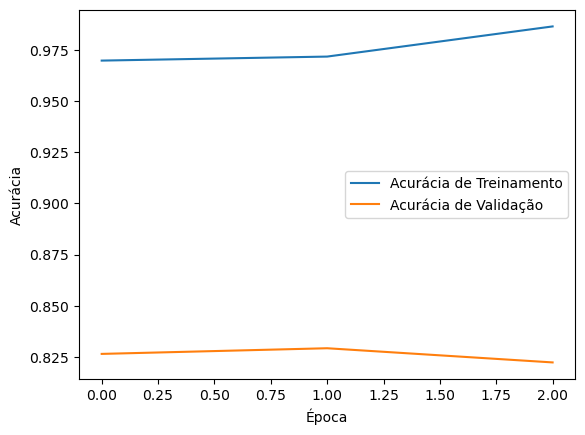

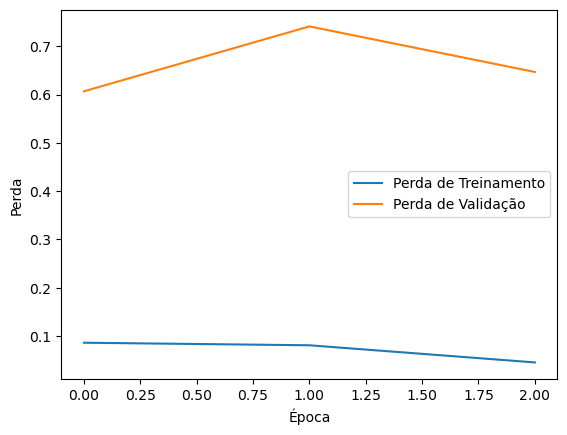

In [7]:
import matplotlib.pyplot as plt

# Plotar a acurácia de treino e validação
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Plotar a perda de treino e validação
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()


In [8]:
# Resultados do treinamento
import pandas as pd

# Criar um DataFrame com o histórico de treinamento
history_df = pd.DataFrame(history.history)

# Exibir o histórico de treinamento e validação
print("Histórico de Treinamento e Validação:")
print(history_df)

# Exibir o melhor desempenho da validação
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

print("\nMelhor desempenho de validação:")
print(f'Época: {best_epoch + 1}')
print(f'Perda de Validação: {best_val_loss:.4f}')
print(f'Acurácia de Validação: {best_val_accuracy:.4f}')


Histórico de Treinamento e Validação:
   accuracy      loss  val_accuracy  val_loss
0   0.96968  0.085863       0.82652  0.606823
1   0.97164  0.080578       0.82928  0.741254
2   0.98636  0.045053       0.82236  0.646885

Melhor desempenho de validação:
Época: 1
Perda de Validação: 0.6068
Acurácia de Validação: 0.8265
